#### Objective: Predict if given the demographic, medical and behavioural information the person would have coronary heart disease in coming 10 years.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset:
data_file = r'C:\Users\AnitaM\Downloads\framingham.csv'
hd = pd.read_csv(data_file)

In [3]:
hd.shape

(4238, 16)

In [4]:
hd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# Split the data into train and test:
from sklearn.model_selection import train_test_split
hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=2, stratify=hd['TenYearCHD'])

In [6]:
hd_train.shape

(3390, 16)

In [7]:
hd_test.shape

(848, 16)

In [8]:
# Filling NAs in train and test:

hd_train['education'].fillna(hd_train['education'].median(), inplace=True)
hd_train['cigsPerDay'].fillna(hd_train['cigsPerDay'].median(), inplace=True)
hd_train['totChol'].fillna(hd_train['totChol'].median(), inplace=True)
hd_train['BMI'].fillna(hd_train['BMI'].median(), inplace=True)
hd_train['heartRate'].fillna(hd_train['heartRate'].median(), inplace=True)
hd_train['glucose'].fillna(hd_train['glucose'].median(), inplace=True)

hd_test['education'].fillna(hd_test['education'].median(), inplace=True)
hd_test['cigsPerDay'].fillna(hd_test['cigsPerDay'].median(), inplace=True)
hd_test['totChol'].fillna(hd_test['totChol'].median(), inplace=True)
hd_test['BMI'].fillna(hd_test['BMI'].median(), inplace=True)
hd_test['heartRate'].fillna(hd_test['heartRate'].median(), inplace=True)
hd_test['glucose'].fillna(hd_test['glucose'].median(), inplace=True)

# Droping BPMeds with NA values:
hd_train.dropna(inplace=True)
hd_test.dropna(inplace=True)

In [9]:
hd_train.reset_index(drop=True, inplace=True)
hd_test.reset_index(drop=True, inplace=True)

x_train = hd_train.drop('TenYearCHD', 1)
y_train = hd_train['TenYearCHD']

x_test = hd_test.drop('TenYearCHD', 1)
y_test = hd_test['TenYearCHD']

In [10]:
# Standardize the data using Quantile Transformer due to the presence of outliers:

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')

num_features = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

scaler.fit(x_train[num_features])
scaled_train = scaler.transform(x_train[num_features])

for i,col in enumerate(num_features):
    x_train[col] = scaled_train[:,i]
    
scaled_test = scaler.transform(x_test[num_features])
for i,col in enumerate(num_features):
    x_test[col] = scaled_test[:,i]

In [11]:
x_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,-1.010382,0.864365,1,1.934489,0.0,0,0,0,-0.633317,-0.490721,-0.193143,0.157469,0.015055,-1.242061
1,1,0.365531,5.199338,0,-5.199338,0.0,0,0,0,-0.238089,-1.289578,-0.809168,0.312376,-2.196894,-0.590949
2,1,0.190587,-5.199338,1,0.857097,0.0,0,1,0,0.287442,-0.016310,-1.304121,0.568194,0.452858,-0.687939
3,0,-0.576075,-5.199338,1,0.035135,0.0,0,0,0,0.497809,0.032625,0.374936,0.133166,1.571286,-0.687939
4,1,1.147315,5.199338,1,0.483658,0.0,0,0,0,-0.406079,0.144780,0.114415,0.291367,-1.228607,0.352151


In [12]:
x_test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,1.644369,-5.199338,1,0.483658,1.0,0,1,0,0.720087,2.088211,-0.069056,-0.026349,1.446104,0.031369
1,0,0.278302,-5.199338,0,-5.199338,1.0,0,1,0,-0.071571,0.842694,0.853480,-0.085414,-0.462610,0.220058
2,1,-1.010382,-5.199338,0,-5.199338,0.0,0,1,0,-1.529558,1.584354,-2.456904,0.670557,-0.462610,-0.373591
3,1,0.540882,0.864365,1,0.483658,0.0,0,0,0,-0.451469,-0.401995,-0.025094,0.776478,-0.354822,1.334066
4,0,0.920412,-5.199338,1,0.358833,1.0,0,1,0,1.644369,1.629992,0.020074,2.495452,2.877846,0.651824


In [13]:
# Rescaling the values between 0,1 range using MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_features = ['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

scaler.fit(x_train[num_features])
scaled_train = scaler.transform(x_train[num_features])

for i,col in enumerate(num_features):
    x_train[col] = scaled_train[:,i]
    
scaled_test = scaler.transform(x_test[num_features])
for i,col in enumerate(num_features):
    x_test[col] = scaled_test[:,i]

In [14]:
x_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,0.402836,0.583123,1,0.686032,0.0,0,0,0,0.439096,0.452809,0.481426,0.515143,0.501448,0.380556
1,1,0.535152,1.000000,0,0.000000,0.0,0,0,0,0.477104,0.375986,0.422185,0.530040,0.288733,0.443171
2,1,0.518328,0.000000,1,0.582424,0.0,0,1,0,0.527642,0.498432,0.374588,0.554641,0.543550,0.433844
3,0,0.444601,0.000000,1,0.503379,0.0,0,0,0,0.547872,0.503137,0.536056,0.512806,0.651104,0.433844
4,1,0.610333,1.000000,1,0.546511,0.0,0,0,0,0.460949,0.513923,0.511003,0.528020,0.381850,0.533865


In [15]:
x_test.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,0.658133,0.000000,1,0.546511,1.0,0,1,0,0.569248,0.700815,0.493359,0.497466,0.639066,0.503017
1,0,0.526763,0.000000,0,0.000000,1.0,0,1,0,0.493117,0.581039,0.582076,0.491786,0.455513,0.521162
2,1,0.402836,0.000000,0,0.000000,0.0,0,1,0,0.352908,0.652361,0.263729,0.564485,0.455513,0.464073
3,1,0.552015,0.583123,1,0.546511,0.0,0,0,0,0.456584,0.461342,0.497587,0.574671,0.465878,0.628292
4,0,0.588512,0.000000,1,0.534508,1.0,0,1,0,0.658133,0.656750,0.501930,0.739978,0.776751,0.562683


In [16]:
# Using SMOTE to balance the imbalanced class:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train.ravel())

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score

In [18]:
# Performance of models when all the features are used:

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), 
          SVC(), KNeighborsClassifier()]

names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGB', 'SVM', 'KNN']
for model, name in zip(models, names):
    print(name)
    for score in ["f1", "precision", "recall"]:
        print(score,
              " : ",
              cross_val_score(model, x_train_smote, y_train_smote, scoring=score, cv=10).mean())

Logistic Regression
f1  :  0.6747465035657454
precision  :  0.6649774729409614
recall  :  0.6852112676056338
Decision Tree
f1  :  0.8000923881125355
precision  :  0.7891613440930965
recall  :  0.8197183098591548
Random Forest
f1  :  0.9096671791191013
precision  :  0.8977277774234512
recall  :  0.9260563380281692
XGB
f1  :  0.8586159134279212
precision  :  0.9181834929248518
recall  :  0.8570422535211266
SVM
f1  :  0.6923238874498188
precision  :  0.6794409752600974
recall  :  0.7063380281690141
KNN
f1  :  0.8316573613150716
precision  :  0.727773259682387
recall  :  0.9704225352112676


In [19]:
model = LogisticRegression()
model.fit(x_train_smote, y_train_smote)
print(classification_report(y_train_smote, model.predict(x_train_smote)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2840
           1       0.67      0.69      0.68      2840

    accuracy                           0.67      5680
   macro avg       0.67      0.67      0.67      5680
weighted avg       0.67      0.67      0.67      5680

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       712
           1       0.28      0.71      0.40       127

    accuracy                           0.68       839
   macro avg       0.60      0.69      0.59       839
weighted avg       0.83      0.68      0.72       839



In [20]:
print('train : ', fbeta_score(y_train_smote, model.predict(x_train_smote), beta=2))
print('test : ', fbeta_score(y_test, model.predict(x_test), beta=2))

train :  0.6821841092054604
test :  0.5402160864345738


In [22]:
model = DecisionTreeClassifier()
model.fit(x_train_smote, y_train_smote)
print(classification_report(y_train_smote, model.predict(x_train_smote)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      2840

    accuracy                           1.00      5680
   macro avg       1.00      1.00      1.00      5680
weighted avg       1.00      1.00      1.00      5680

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       712
           1       0.22      0.39      0.28       127

    accuracy                           0.70       839
   macro avg       0.55      0.57      0.55       839
weighted avg       0.78      0.70      0.73       839



In [23]:
print('train : ', fbeta_score(y_train_smote, model.predict(x_train_smote), beta=2))
print('test : ', fbeta_score(y_test, model.predict(x_test), beta=2))

train :  1.0
test :  0.3401360544217687


In [24]:
model = RandomForestClassifier()
model.fit(x_train_smote, y_train_smote)
print(classification_report(y_train_smote, model.predict(x_train_smote)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      2840

    accuracy                           1.00      5680
   macro avg       1.00      1.00      1.00      5680
weighted avg       1.00      1.00      1.00      5680

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       712
           1       0.28      0.28      0.28       127

    accuracy                           0.78       839
   macro avg       0.57      0.57      0.57       839
weighted avg       0.78      0.78      0.78       839



In [25]:
print('train : ', fbeta_score(y_train_smote, model.predict(x_train_smote), beta=2))
print('test : ', fbeta_score(y_test, model.predict(x_test), beta=2))

train :  1.0
test :  0.2755905511811024


In [26]:
model = XGBClassifier()
model.fit(x_train_smote, y_train_smote)
print(classification_report(y_train_smote, model.predict(x_train_smote)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2840
           1       1.00      0.98      0.99      2840

    accuracy                           0.99      5680
   macro avg       0.99      0.99      0.99      5680
weighted avg       0.99      0.99      0.99      5680

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       712
           1       0.36      0.21      0.27       127

    accuracy                           0.82       839
   macro avg       0.61      0.57      0.58       839
weighted avg       0.79      0.82      0.80       839



In [27]:
print('train : ', fbeta_score(y_train_smote, model.predict(x_train_smote), beta=2))
print('test : ', fbeta_score(y_test, model.predict(x_test), beta=2))

train :  0.9871441689623508
test :  0.23116438356164382


In [28]:
model = KNeighborsClassifier()
model.fit(x_train_smote, y_train_smote)
print(classification_report(y_train_smote, model.predict(x_train_smote)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84      2840
           1       0.79      0.99      0.88      2840

    accuracy                           0.86      5680
   macro avg       0.89      0.86      0.86      5680
weighted avg       0.89      0.86      0.86      5680

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       712
           1       0.21      0.51      0.30       127

    accuracy                           0.63       839
   macro avg       0.55      0.58      0.53       839
weighted avg       0.78      0.63      0.68       839



In [29]:
print('train : ', fbeta_score(y_train_smote, model.predict(x_train_smote), beta=2))
print('test : ', fbeta_score(y_test, model.predict(x_test), beta=2))

train :  0.9443253383357899
test :  0.39731051344743273


In [30]:
model = SVC()
model.fit(x_train_smote, y_train_smote)
print(classification_report(y_train_smote, model.predict(x_train_smote)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      2840
           1       0.69      0.72      0.71      2840

    accuracy                           0.70      5680
   macro avg       0.70      0.70      0.70      5680
weighted avg       0.70      0.70      0.70      5680

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       712
           1       0.26      0.66      0.37       127

    accuracy                           0.66       839
   macro avg       0.59      0.66      0.57       839
weighted avg       0.82      0.66      0.71       839



In [31]:
print('train : ', fbeta_score(y_train_smote, model.predict(x_train_smote), beta=2))
print('test : ', fbeta_score(y_test, model.predict(x_test), beta=2))

train :  0.7122367592527811
test :  0.5035971223021584


In [32]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_smote, y_train_smote)
print(classification_report(y_train_smote, model.predict(x_train_smote)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65      2840
           1       0.65      0.53      0.58      2840

    accuracy                           0.62      5680
   macro avg       0.62      0.62      0.61      5680
weighted avg       0.62      0.62      0.61      5680

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       712
           1       0.26      0.54      0.35       127

    accuracy                           0.69       839
   macro avg       0.58      0.63      0.57       839
weighted avg       0.80      0.69      0.73       839



In [33]:
print('train : ', fbeta_score(y_train_smote, model.predict(x_train_smote), beta=2))
print('test : ', fbeta_score(y_test, model.predict(x_test), beta=2))

train :  0.5456008191325971
test :  0.44401544401544407


In [34]:
# Checking feature importance using a Random Forest Classification model and using those features to see if they improve performance:

import matplotlib.pyplot as plt
%matplotlib inline

rf_sample = RandomForestClassifier()
rf_sample.fit(x_train_smote, y_train_smote)

for score in ['f1', 'precision', 'recall']:
    print(score,
          ' : ',
          cross_val_score(rf_sample, x_train_smote, y_train_smote, scoring=score, cv=10).mean())

f1  :  0.9118445119862881
precision  :  0.8942862836084912
recall  :  0.9225352112676056


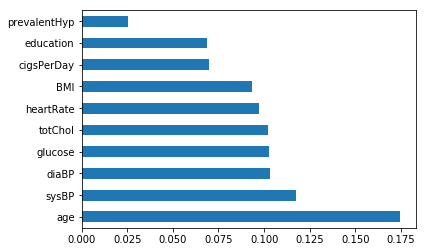

age             0.174653
sysBP           0.117704
diaBP           0.103302
glucose         0.102878
totChol         0.102038
heartRate       0.097289
BMI             0.093433
cigsPerDay      0.069692
education       0.068503
prevalentHyp    0.025408
dtype: float64


In [35]:
feat_imp = pd.Series(rf_sample.feature_importances_, index=x_train_smote.columns)

df_imp_feat = feat_imp.nlargest(10)

df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [38]:
imp_feat_rf = ['age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate', 'BMI', 'education',
                                           'cigsPerDay', 'prevalentHyp']

In [39]:
# Using the above important features to build a random forest model to check its performance:
rf_sample_imp_feat = RandomForestClassifier()
for score in ['f1', 'precision', 'recall']:
    print(score,
          ' : ',
          cross_val_score(rf_sample_imp_feat, x_train_smote[imp_feat_rf], y_train_smote, scoring=score, cv=10).mean())

f1  :  0.8999201882202585
precision  :  0.8802577489941065
recall  :  0.9161971830985914


In [40]:
# Performance of models when these selected features are used:

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), 
          SVC(), KNeighborsClassifier(), MultinomialNB()]

names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGB', 'SVM', 'KNN', 'NB']
for model, name in zip(models, names):
    print(name)
    model.fit(x_train_smote[imp_feat_rf], y_train_smote)
    print(classification_report(y_train_smote, model.predict(x_train_smote[imp_feat_rf])))
    print(classification_report(y_test, model.predict(x_test[imp_feat_rf])))
    print('Train score : ', fbeta_score(y_train_smote, model.predict(x_train_smote[imp_feat_rf]), beta=2))
    print('Test score : ', fbeta_score(y_test, model.predict(x_test[imp_feat_rf]), beta=2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2840
           1       0.66      0.67      0.67      2840

    accuracy                           0.66      5680
   macro avg       0.66      0.66      0.66      5680
weighted avg       0.66      0.66      0.66      5680

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       712
           1       0.27      0.69      0.39       127

    accuracy                           0.67       839
   macro avg       0.60      0.68      0.58       839
weighted avg       0.82      0.67      0.72       839

Train score :  0.6706162798850173
Test score :  0.5240963855421686
Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      2840

    accuracy                           1.00      5680
   macro avg       1.00    

In [41]:
# selecting 10 best features using Chi-squqred function:

from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(x_train_smote,y_train_smote)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train_smote.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))

     Feature_Name       Score
7    prevalentHyp  191.629032
8        diabetes   40.475936
0            male   37.574695
5          BPMeds   27.509610
2       education   16.724800
1             age    9.302095
10          sysBP    7.427628
11          diaBP    3.507215
4      cigsPerDay    1.956120
3   currentSmoker    1.202418


In [42]:
# Using the above features to build models to check their performance:
imp_feat_chi2 = ['prevalentHyp', 'diabetes', 'male', 'BPMeds', 'education', 'age', 'sysBP', 
                                             'diaBP', 'cigsPerDay', 'currentSmoker']

In [44]:
# Performance of models when these selected features are used:

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), 
          SVC(), KNeighborsClassifier(), MultinomialNB()]

names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGB', 'SVM', 'KNN', 'NB']
for model, name in zip(models, names):
    print(name)
    model.fit(x_train_smote[imp_feat_chi2], y_train_smote)
    print(classification_report(y_train_smote, model.predict(x_train_smote[imp_feat_chi2])))
    print(classification_report(y_test, model.predict(x_test[imp_feat_chi2])))
    print('Train score : ', fbeta_score(y_train_smote, model.predict(x_train_smote[imp_feat_chi2]), beta=2))
    print('Test score : ', fbeta_score(y_test, model.predict(x_test[imp_feat_chi2]), beta=2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      2840
           1       0.67      0.68      0.67      2840

    accuracy                           0.67      5680
   macro avg       0.67      0.67      0.67      5680
weighted avg       0.67      0.67      0.67      5680

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       712
           1       0.28      0.71      0.40       127

    accuracy                           0.68       839
   macro avg       0.60      0.69      0.59       839
weighted avg       0.83      0.68      0.72       839

Train score :  0.6786315199102636
Test score :  0.5408653846153846
Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      2840

    accuracy                           1.00      5680
   macro avg       1.00    

In [45]:
# selecting 10 best features using f_classif function:

from sklearn.feature_selection import SelectKBest, f_classif

best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train_smote,y_train_smote)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train_smote.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))

    Feature_Name       Score
1            age  641.512915
10         sysBP  442.445565
7   prevalentHyp  334.135655
11         diaBP  199.565857
0           male   70.682259
12           BMI   56.237554
14       glucose   52.709303
9        totChol   51.894149
2      education   51.409176
8       diabetes   42.149720


In [46]:
# Using the above features to build models to check their performance:
imp_feat_fclassif = ['age', 'sysBP', 'prevalentHyp', 'diaBP', 'male', 'BMI', 'glucose', 
                                             'totChol', 'education', 'diabetes']

In [49]:
# Performance of models when these selected features are used:

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(), 
          SVC(), KNeighborsClassifier(), MultinomialNB()]

names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGB', 'SVM', 'KNN', 'NB']
for model, name in zip(models, names):
    print(name)
    model.fit(x_train_smote[imp_feat_fclassif], y_train_smote)
    print(classification_report(y_train_smote, model.predict(x_train_smote[imp_feat_fclassif])))
    print(classification_report(y_test, model.predict(x_test[imp_feat_fclassif])))
    print('Train score : ', fbeta_score(y_train_smote, model.predict(x_train_smote[imp_feat_fclassif]), beta=2))
    print('Test score : ', fbeta_score(y_test, model.predict(x_test[imp_feat_fclassif]), beta=2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      2840
           1       0.66      0.69      0.68      2840

    accuracy                           0.67      5680
   macro avg       0.67      0.67      0.67      5680
weighted avg       0.67      0.67      0.67      5680

              precision    recall  f1-score   support

           0       0.93      0.65      0.77       712
           1       0.27      0.73      0.40       127

    accuracy                           0.66       839
   macro avg       0.60      0.69      0.58       839
weighted avg       0.83      0.66      0.71       839

Train score :  0.6831212417843657
Test score :  0.5477031802120141
Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2840
           1       1.00      1.00      1.00      2840

    accuracy                           1.00      5680
   macro avg       1.00    

In [50]:
# Hyper tuning LR model with all parameters and NB model with selected parameters from Chi2.

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [82]:
param_lr = {'penalty' : ['l1','l2'],
          'C' : np.linspace(0.01,10,1000)
}

In [83]:
grid_search = GridSearchCV(LogisticRegression(random_state=2),
                           param_grid=param_lr,
                           cv=10,
                           scoring='recall')

In [84]:
grid_search.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2),
             param_grid={'C': array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.5...
        9.37,  9.38,  9.39,  9.4 ,  9.41,  9.42,  9.43,  9.44,  9.45,
        9.46,  9.47,  9.48,  9.49,  9.5 ,  9.51,  9.52,  9.53,  9.54,
        9.55,  9.56,  9.57,  9.58,  9.59,  9.6 ,  9.61,  9.62,  9.63,
        9.64,  9.65,  9.66,  9.67,  9.68,  9.69,  9.7 ,  9.71,  9.72,
        9.73,  9.74,  9.75,  9.76,  9.77,  9.78,  9.79,  9.8 ,  9.81,
        9.82,  9.83,  9.84,  9.85,  9.86,  9.87,  9.88,  9.89,  9.9 ,
        9.91,  9.92,  9.93,  9.94,  9.95,  9.96,  9.97,  9.98, 

In [85]:
lr_model = grid_search.best_estimator_

In [86]:
print(classification_report(y_test, lr_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       712
           1       0.28      0.71      0.40       127

    accuracy                           0.68       839
   macro avg       0.60      0.69      0.59       839
weighted avg       0.83      0.68      0.72       839



In [87]:
print(classification_report(y_train_smote, lr_model.predict(x_train_smote)))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2840
           1       0.67      0.69      0.68      2840

    accuracy                           0.67      5680
   macro avg       0.67      0.67      0.67      5680
weighted avg       0.67      0.67      0.67      5680



In [88]:
fbeta_score(y_test, lr_model.predict(x_test), beta=2)

0.5415162454873647

In [89]:
fbeta_score(y_train_smote, lr_model.predict(x_train_smote), beta=2)

0.6839012103827049

In [90]:
param_nb = {'alpha' : np.linspace(0.01,10,100)}

In [91]:
random_search = RandomizedSearchCV(MultinomialNB(), n_iter=60,
                                   cv=10,
                                   scoring='recall',
                                   random_state=2,
                                   param_distributions=param_nb)

In [92]:
random_search.fit(x_train_smote[imp_feat_chi2], y_train_smote)

RandomizedSearchCV(cv=10, estimator=MultinomialNB(), n_iter=60,
                   param_distributions={'alpha': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ])},
                   ra

In [93]:
mnb_model = random_search.best_estimator_

In [94]:
print(classification_report(y_test, mnb_model.predict(x_test[imp_feat_chi2])))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       712
           1       0.24      0.58      0.34       127

    accuracy                           0.66       839
   macro avg       0.57      0.63      0.56       839
weighted avg       0.80      0.66      0.71       839



In [95]:
print(classification_report(y_train_smote, mnb_model.predict(x_train_smote[imp_feat_chi2])))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2840
           1       0.63      0.54      0.58      2840

    accuracy                           0.61      5680
   macro avg       0.61      0.61      0.61      5680
weighted avg       0.61      0.61      0.61      5680



In [96]:
fbeta_score(y_test, mnb_model.predict(x_test[imp_feat_chi2]), beta=2)

0.4556650246305418

In [97]:
fbeta_score(y_train_smote, mnb_model.predict(x_train_smote[imp_feat_chi2]), beta=2)

0.5527747551686616

In [98]:
# Saving Multinomial bayes model
import pickle

# open a file, where you ant to store the data
file = open('Heart_DiseasePred.pkl', 'wb')

# dump information to that file
pickle.dump(mnb_model, file)